In [1]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii

from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))
Lum_He2 = float(Mod.get_emis_vol('HE_2_164043A'))



#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_Mg','r')
header = f.readline()
frac_Mg_II = np.zeros(435)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    frac_Mg_II[i] = j
    i = i + 1
N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

print('N_H', N_H)
print('Lya',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 4.084327e+41
H__1_102572A 2.122730e+38
H__1_486133A 1.448254e+40
H__1_656281A 4.094903e+40
O__6_103191A 5.788869e+38
O__6_103762A 3.534860e+38
HE_2_972108A 4.677111e+38
HE_2_102527A 1.142198e+39
HE_2_164043A 1.330135e+40
C__4_155078A 1.499172e+39
O__3_500684A 8.673524e+40
N__5_123882A 4.059618e+38
N__5_124280A 2.683961e+38
C__4_154819A 2.822319e+39
C__4_155078A_1 1.499172e+39
MG_2_279553A 6.005534e+39
MG_2_280271A 3.113503e+39


ValueError: operands could not be broadcast together with shapes (423,) (435,) 

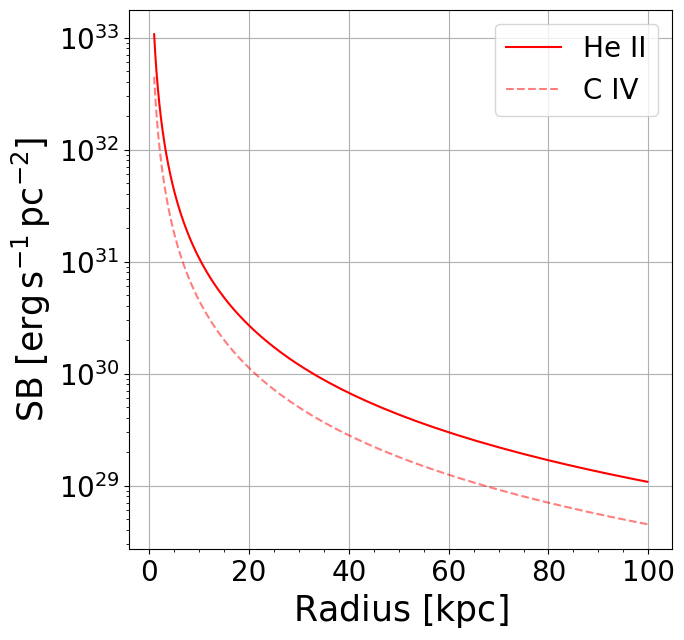

In [ ]:
fig = plt.figure(1,figsize=(7,7))
F_SB_CIV = (Lum_C4 / np.pi / 4) / (Mod.radius/kpc * 1000)**2
F_SB_HeII = (Lum_He2 / np.pi / 4) / (Mod.radius/kpc*1000)**2

plt.plot(Mod.radius/kpc, F_SB_HeII,'r-',label='He II')
plt.plot(Mod.radius/kpc, F_SB_CIV,'r--',alpha=0.5,label='C IV')


plt.yscale('log')
plt.xlabel('Radius $[\\rm kpc]$',fontsize=25)
plt.ylabel('SB $[\\rm erg \, s^{-1} \, pc^{-2}$]',fontsize=25)
plt.minorticks_on()
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/SB_He_CIV.pdf',bbox_inches='tight')

In [ ]:
tt = Mod.get_Hb_SB()
tt

1.1825233441559843e-18

(5e+35, 7e+38)

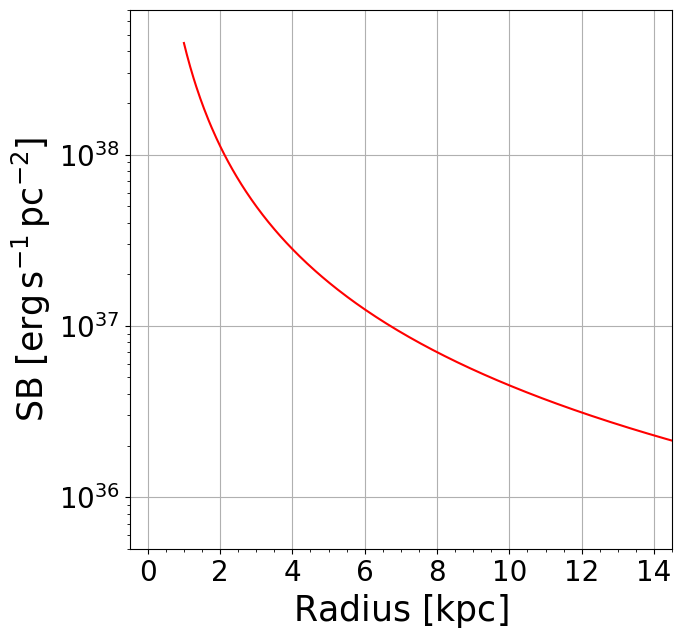

In [ ]:
fig = plt.figure(1,figsize=(7,7))
F_SB_CIV = (Lum_C4 / np.pi / 4) / (Mod.radius/kpc)**2
F_SB_CIV = (Lum_C4 / np.pi / 4) / (Mod.radius/kpc)**2
plt.plot(Mod.radius/kpc, F_SB_CIV,'r-',label='C IV')

plt.yscale('log')
plt.xlabel('Radius $[\\rm kpc]$',fontsize=25)
plt.ylabel('SB $[\\rm erg \, s^{-1} \, pc^{-2}$]',fontsize=25)
plt.minorticks_on()
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.5,14.5)
plt.ylim(top=7e38,bottom=5e35)
# plt.ylim(4*10^(35),5*10^(56))

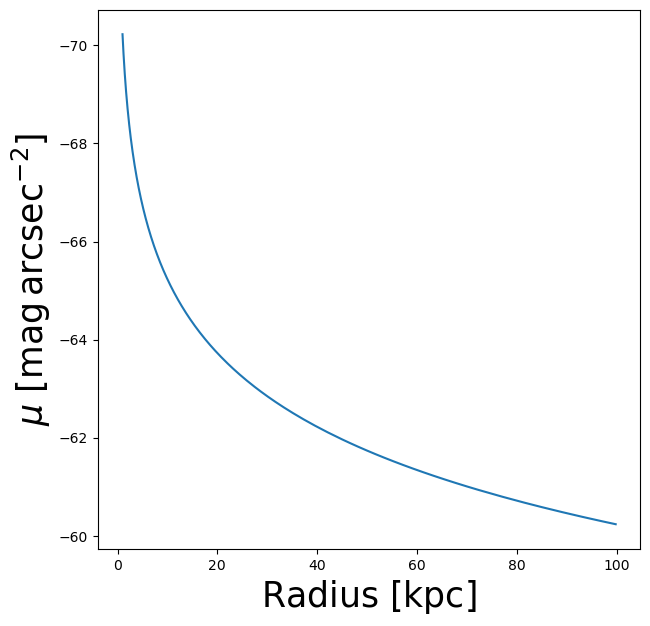

In [ ]:
fig = plt.figure(1,figsize=(7,7))
F_SB = (Lum_C4 / np.pi / 4) / (Mod.radius/kpc)**2
mu = -2.5*np.log10(F_SB) + 26.4
plt.plot(Mod.radius/kpc, mu )
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Radius $[\\rm kpc]$',fontsize=25)
plt.ylabel('$\mu ~ [\\rm mag \, arcsec^{-2}$]',fontsize=25)
plt.gca().invert_yaxis()